<a href="https://colab.research.google.com/github/ShagunGupta07/IPL_ANALYIS/blob/main/IPL_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IPL ANALYSIS

ANALYSIS IS BASED ON:

(I) IN WHICH YEAR MAXIMUM MATCHES PLAYED

(II) TOP TWO TEAMS WITH HIGHEST WINNING PERCENTAGE

(III) PERSON WHO BECOMES 'MAN OF THE MATCH; MAXIMUM TIMES

(IV) VICTORY MARGIN FOR THE TEAMS(BATTING FIRST)

(V) TEAMS AND PLAYERS WHO ACED WHILE BATTING FIRST

(VI) VICTORY MARGIN FOR THE TEAMS(BATTING SECOND)

(VII) TEAMS AND PLAYERS WHO ACED WHILE BATTING SECOND

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv("/content/IPL_Analysis.csv")
df.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [3]:
df.shape

(950, 20)

In [4]:
df[df.Margin.isnull()].head()
# This shows that when Margin is null matches will be decided by SuperOver

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
114,1254077,Chennai,2021-04-25,2021,20,Delhi Capitals,Sunrisers Hyderabad,"MA Chidambaram Stadium, Chepauk, Chennai",Delhi Capitals,bat,Y,Delhi Capitals,SuperOver,NaN,NaN,PP Shaw,"['PP Shaw', 'S Dhawan', 'RR Pant', 'SPD Smith'...","['DA Warner', 'JM Bairstow', 'KS Williamson', ...",CB Gaffaney,KN Ananthapadmanabhan
158,1216512,Abu Dhabi,2020-10-18,2020/21,35,Kolkata Knight Riders,Sunrisers Hyderabad,Sheikh Zayed Stadium,Sunrisers Hyderabad,field,Y,Kolkata Knight Riders,SuperOver,NaN,NaN,LH Ferguson,"['Shubman Gill', 'RA Tripathi', 'N Rana', 'AD ...","['JM Bairstow', 'KS Williamson', 'PK Garg', 'D...",PG Pathak,S Ravi
159,1216517,NaN,2020-10-18,2020/21,36,Mumbai Indians,Kings XI Punjab,Dubai International Cricket Stadium,Mumbai Indians,bat,Y,Kings XI Punjab,SuperOver,NaN,NaN,KL Rahul,"['RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan ...","['KL Rahul', 'MA Agarwal', 'CH Gayle', 'N Poor...",Nitin Menon,PR Reiffel
184,1216547,NaN,2020-09-28,2020/21,10,Royal Challengers Bangalore,Mumbai Indians,Dubai International Cricket Stadium,Mumbai Indians,field,Y,Royal Challengers Bangalore,SuperOver,NaN,NaN,AB de Villiers,"['D Padikkal', 'AJ Finch', 'V Kohli', 'AB de V...","['RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan ...",Nitin Menon,PR Reiffel
192,1216493,NaN,2020-09-20,2020/21,2,Delhi Capitals,Kings XI Punjab,Dubai International Cricket Stadium,Kings XI Punjab,field,Y,Delhi Capitals,SuperOver,NaN,NaN,MP Stoinis,"['PP Shaw', 'S Dhawan', 'SO Hetmyer', 'SS Iyer...","['KL Rahul', 'MA Agarwal', 'KK Nair', 'N Poora...",AK Chaudhary,Nitin Menon


In [5]:
#checking null values in all columns
df.isnull().sum()

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64

In [6]:
df["WonBy"].value_counts()

# Matches with no results are the ones called off due to variuos reasons like rain etc.

Wickets      509
Runs         423
SuperOver     14
NoResults      4
Name: WonBy, dtype: int64

In [7]:
df.nunique(axis=0)

ID                 950
City                33
Date               706
Season              15
MatchNumber         80
Team1               18
Team2               18
Venue               49
TossWinner          18
TossDecision         2
SuperOver            2
WinningTeam         18
WonBy                4
Margin              94
method               1
Player_of_Match    262
Team1Players       932
Team2Players       937
Umpire1             58
Umpire2             60
dtype: int64

# (i) MAXIMUM MATCHES PLAYED

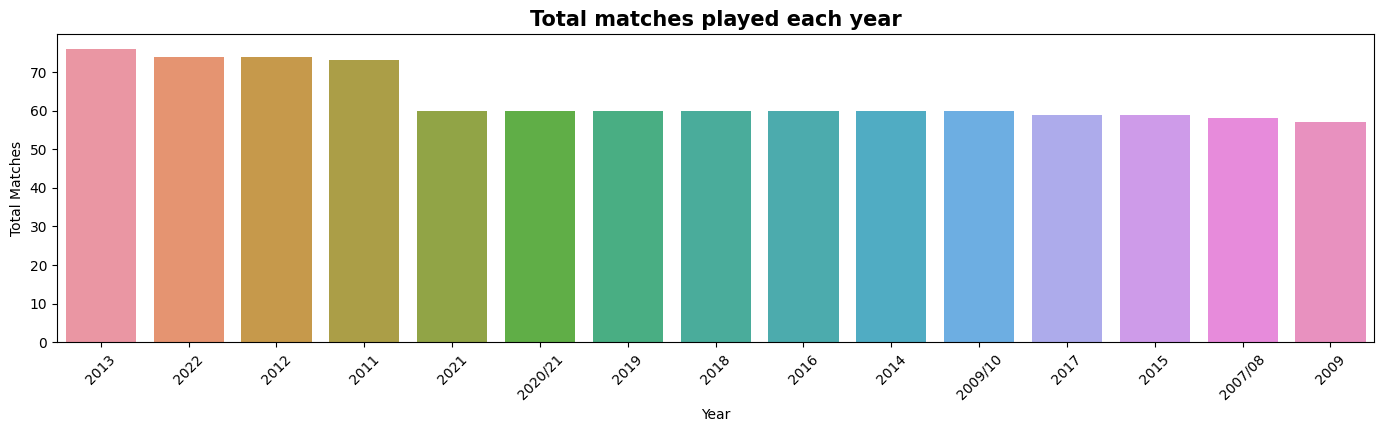

In [8]:
plt.figure(figsize=(17,4))
plot1=sns.barplot(x=list(df["Season"].value_counts().keys()),y=list(df["Season"].value_counts()),data=df)
plt.xticks(rotation=45)

plt.xlabel("Year")
plt.ylabel("Total Matches")
plt.title("Total matches played each year",fontsize=15,loc='Center',fontweight='bold')

plt.show(plot1)

In [9]:
df['WinningTeam'].value_counts()

Mumbai Indians                 131
Chennai Super Kings            121
Kolkata Knight Riders          114
Royal Challengers Bangalore    109
Rajasthan Royals                96
Kings XI Punjab                 88
Sunrisers Hyderabad             75
Delhi Daredevils                67
Delhi Capitals                  36
Deccan Chargers                 29
Gujarat Lions                   13
Punjab Kings                    13
Pune Warriors                   12
Gujarat Titans                  12
Rising Pune Supergiant          10
Lucknow Super Giants             9
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: WinningTeam, dtype: int64

In [10]:
#merging "Rising Pune Supergiant" and "Rising Pune Supergiants" data as they are the same team.
df = df.replace(['Rising Pune Supergiant'], 'Rising Pune Supergiants')

In [11]:
X=df['WinningTeam'].value_counts()
X

Mumbai Indians                 131
Chennai Super Kings            121
Kolkata Knight Riders          114
Royal Challengers Bangalore    109
Rajasthan Royals                96
Kings XI Punjab                 88
Sunrisers Hyderabad             75
Delhi Daredevils                67
Delhi Capitals                  36
Deccan Chargers                 29
Rising Pune Supergiants         15
Punjab Kings                    13
Gujarat Lions                   13
Pune Warriors                   12
Gujarat Titans                  12
Lucknow Super Giants             9
Kochi Tuskers Kerala             6
Name: WinningTeam, dtype: int64

# THESE NUMBER SHOWS MUMBAI INDIANS WON MAXIMUM TIMES

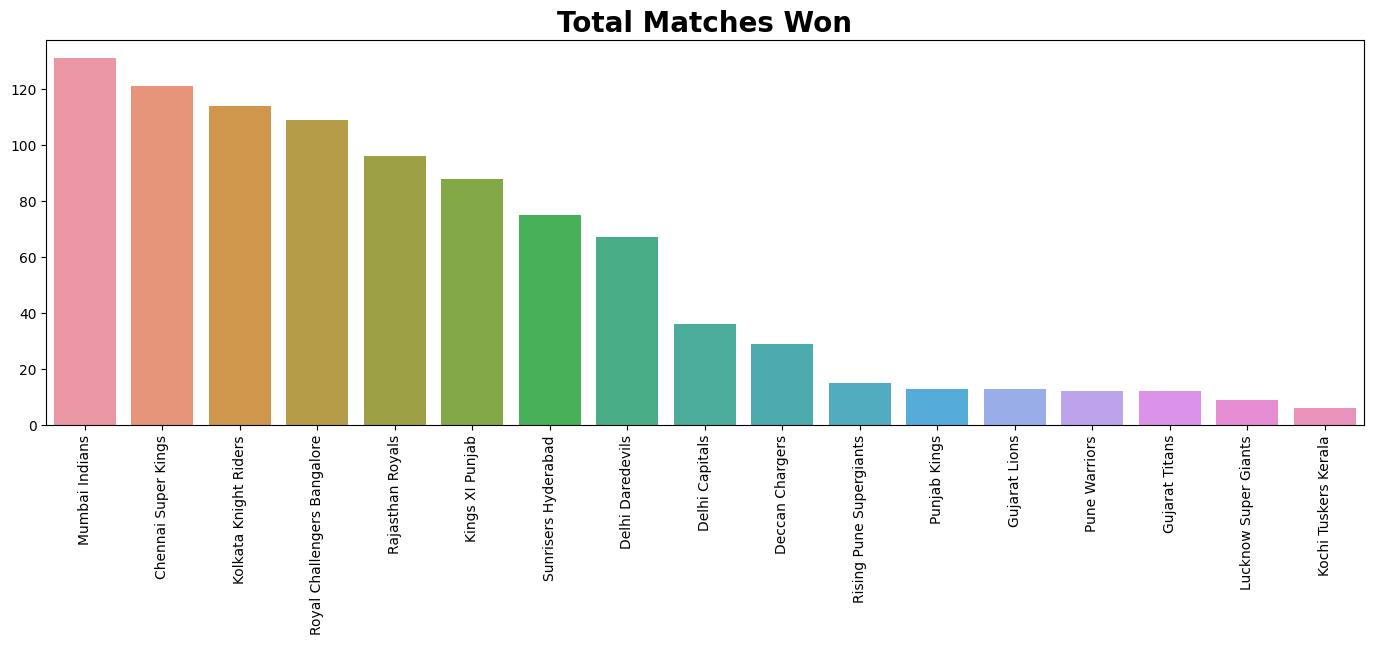

In [12]:
plt.figure(figsize=(17,5))
plot2=sns.barplot(x=list(df['WinningTeam'].value_counts().keys()),y=list(df['WinningTeam'].value_counts()),data=df)
plt.xticks(rotation=90)
plt.title("Total Matches Won",fontsize=20,loc='center',fontweight='bold')

plt.show(plot2)

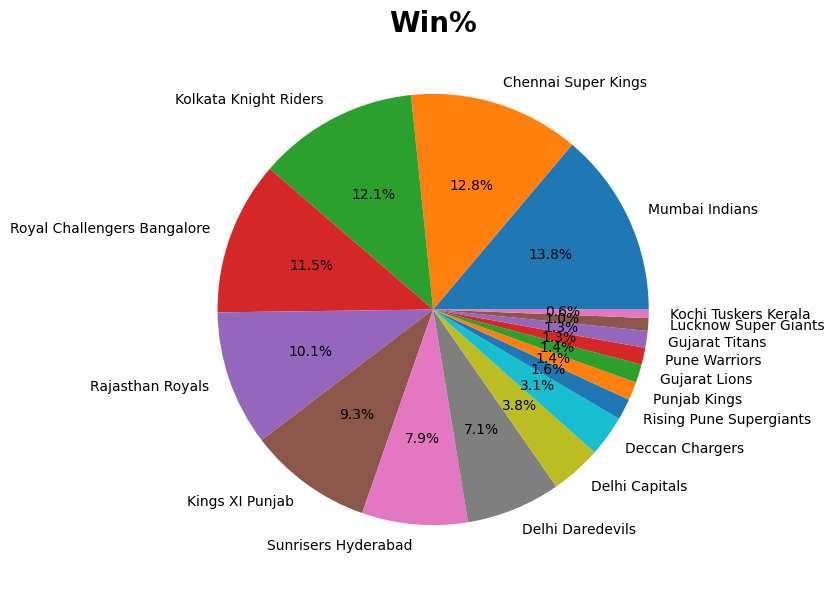

In [13]:
plt.figure(figsize=(7,7))
plot2a=plt.pie(list(df['WinningTeam'].value_counts()),labels=list(df['WinningTeam'].value_counts().keys()),
             autopct='%0.1f%%')
plt.title("Win%",fontsize=20,loc='center',fontweight='bold')
plt.show()

# MOST SUCCESSFUL FRANCHISE: MUMBAI INDIANS & CHENNAI SUPERKINGS
# COMPETITIVE FRANCHISE: KOLKATA KNIGHT RIDERS & ROYAL CHALLENGERS BANGLORE

In [14]:
df['Player_of_Match'].value_counts()[0:10]

AB de Villiers    25
CH Gayle          22
DA Warner         18
RG Sharma         18
MS Dhoni          17
YK Pathan         16
SR Watson         16
KA Pollard        14
SK Raina          14
V Kohli           14
Name: Player_of_Match, dtype: int64

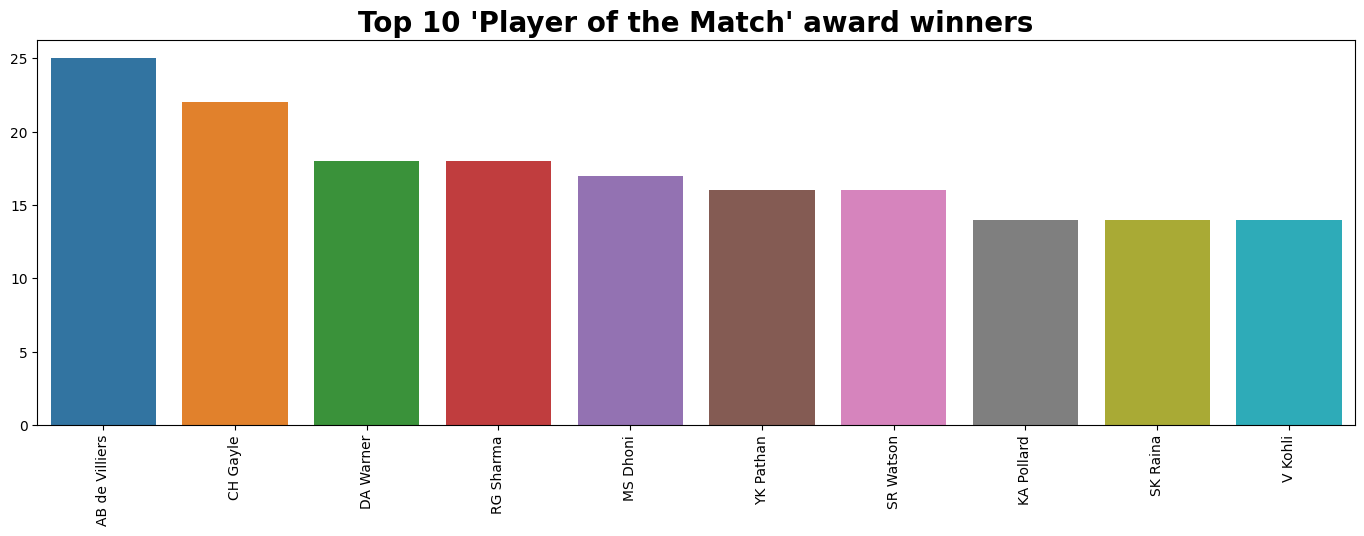

In [15]:
plt.figure(figsize=(17,5))
plot3=sns.barplot(x=list(df['Player_of_Match'].value_counts()[0:10].keys()),y=list(df['Player_of_Match'].value_counts()[0:10]),data=df)
plt.xticks(rotation=90)
plt.title("Top 10 'Player of the Match' award winners",fontsize=20,loc='center',fontweight='bold')

plt.show(plot3)

# HERE, AB DEVILLIERS BECOME MAXIMUM TIMES MAN OF THE MATCH

In [16]:
df['TossWinner'].value_counts()

Mumbai Indians                 123
Kolkata Knight Riders          114
Chennai Super Kings            109
Royal Challengers Bangalore    105
Rajasthan Royals                99
Kings XI Punjab                 85
Delhi Daredevils                80
Sunrisers Hyderabad             74
Deccan Chargers                 43
Delhi Capitals                  36
Pune Warriors                   20
Gujarat Lions                   15
Rising Pune Supergiants         13
Gujarat Titans                  10
Punjab Kings                     9
Kochi Tuskers Kerala             8
Lucknow Super Giants             7
Name: TossWinner, dtype: int64

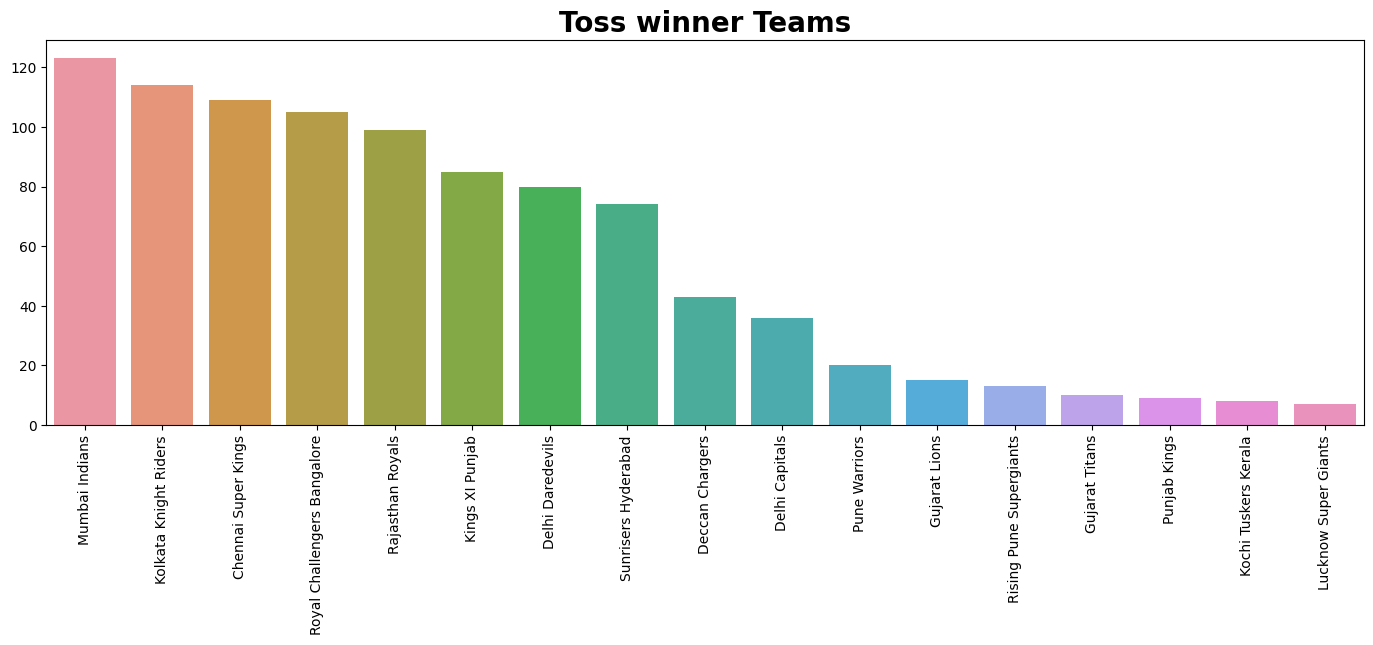

In [17]:
plt.figure(figsize=(17,5))
plot4=sns.barplot(x=list(df['TossWinner'].value_counts().keys()),y=list(df['TossWinner'].value_counts()),data=df)
plt.xticks(rotation=90)
plt.title("Toss winner Teams",fontsize=20,loc='center',fontweight='bold')

plt.show(plot4)

In [18]:
df['WonBy'].value_counts()

Wickets      509
Runs         423
SuperOver     14
NoResults      4
Name: WonBy, dtype: int64

# Batting First Analysis

We have column named "WonBy" and have two variables in it. 'Runs'&'Wickets'. When WonBy is Runs, team batting first wins. We will see Batting Second teams analysis later.

In [19]:
batting_first=df[df['WonBy']=='Runs']
batting_first.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
8,1304112,Navi Mumbai,2022-05-18,2022,66,Lucknow Super Giants,Kolkata Knight Riders,"Dr DY Patil Sports Academy, Mumbai",Lucknow Super Giants,bat,N,Lucknow Super Giants,Runs,2.0,NaN,Q de Kock,"['Q de Kock', 'KL Rahul', 'E Lewis', 'DJ Hooda...","['VR Iyer', 'A Tomar', 'N Rana', 'SS Iyer', 'S...",R Pandit,YC Barde
9,1304111,Mumbai,2022-05-17,2022,65,Sunrisers Hyderabad,Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,field,N,Sunrisers Hyderabad,Runs,3.0,NaN,RA Tripathi,"['Abhishek Sharma', 'PK Garg', 'RA Tripathi', ...","['RG Sharma', 'Ishan Kishan', 'DR Sams', 'Tila...",CB Gaffaney,N Pandit
10,1304110,Navi Mumbai,2022-05-16,2022,64,Delhi Capitals,Punjab Kings,"Dr DY Patil Sports Academy, Mumbai",Punjab Kings,field,N,Delhi Capitals,Runs,17.0,NaN,SN Thakur,"['DA Warner', 'SN Khan', 'MR Marsh', 'Lalit Ya...","['JM Bairstow', 'S Dhawan', 'PBB Rajapaksa', '...",GR Sadashiv Iyer,Nitin Menon
11,1304109,Mumbai,2022-05-15,2022,63,Rajasthan Royals,Lucknow Super Giants,"Brabourne Stadium, Mumbai",Rajasthan Royals,bat,N,Rajasthan Royals,Runs,24.0,NaN,TA Boult,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['Q de Kock', 'KL Rahul', 'A Badoni', 'DJ Hood...",PG Pathak,Tapan Sharma


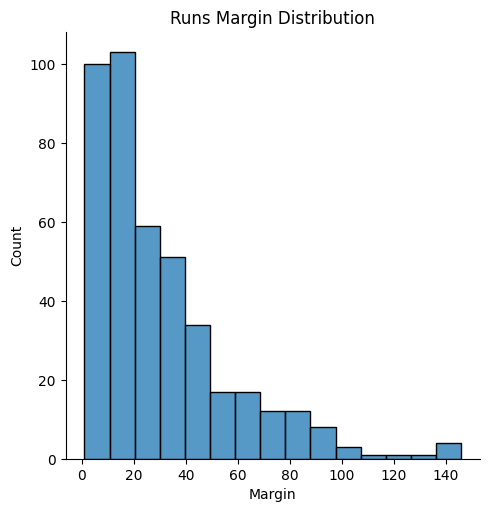

In [20]:
sns.displot(batting_first['Margin'],kde=False,bins=15)
plt.title('Runs Margin Distribution')

plt.show()

# Teams who bat first wins by 10 to 20 runs margin most of the time.
# This distribution also shows the teams are very competitive as most of the matches are won by just 1 to 20 runs margin

In [21]:
batting_first['WinningTeam'].value_counts()

Mumbai Indians                 66
Chennai Super Kings            61
Royal Challengers Bangalore    48
Kolkata Knight Riders          45
Kings XI Punjab                40
Rajasthan Royals               37
Sunrisers Hyderabad            36
Delhi Daredevils               25
Deccan Chargers                18
Delhi Capitals                 13
Punjab Kings                    7
Lucknow Super Giants            7
Rising Pune Supergiants         7
Pune Warriors                   6
Gujarat Titans                  4
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: WinningTeam, dtype: int64

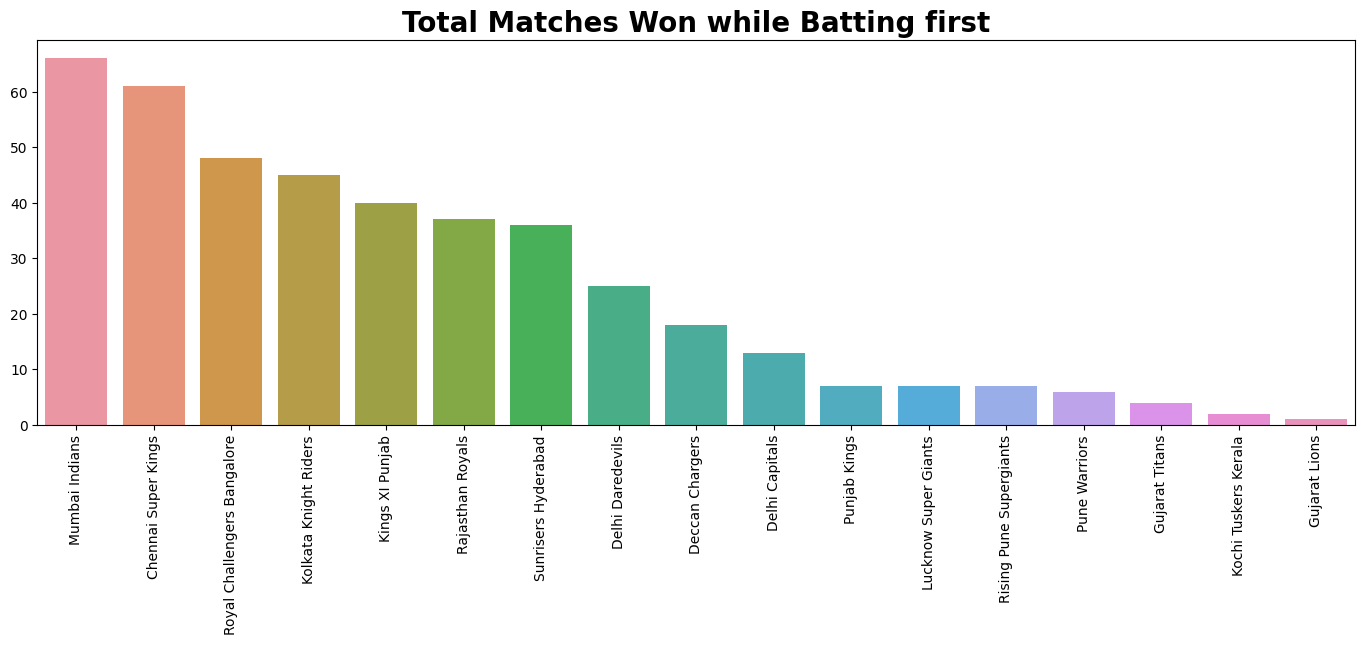

In [22]:
plt.figure(figsize=(17,5))
plot6=sns.barplot(x=list(batting_first['WinningTeam'].value_counts().keys()),y=list(batting_first['WinningTeam'].value_counts())
                  ,data=batting_first)
plt.xticks(rotation=90)
plt.title("Total Matches Won while Batting first",fontsize=20,loc='center',fontweight='bold')



plt.show(plot6)

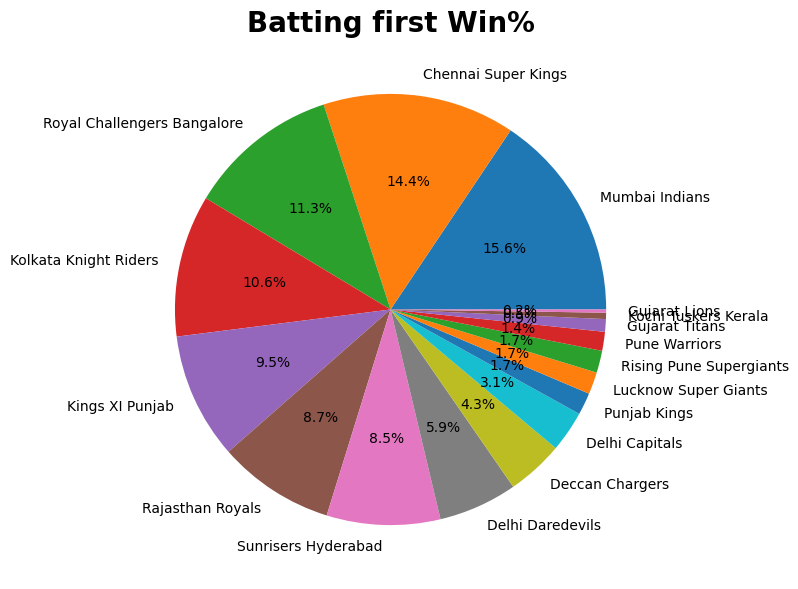

In [23]:
plt.figure(figsize=(7,7))
plot7=plt.pie(list(batting_first['WinningTeam'].value_counts()),labels=list(batting_first['WinningTeam'].value_counts().keys()),
             autopct='%0.1f%%')

plt.title("Batting first Win%",fontsize=20,loc='center',fontweight='bold')
plt.show(plot7)

# Mumbai Indians won most of their matches by batting first.

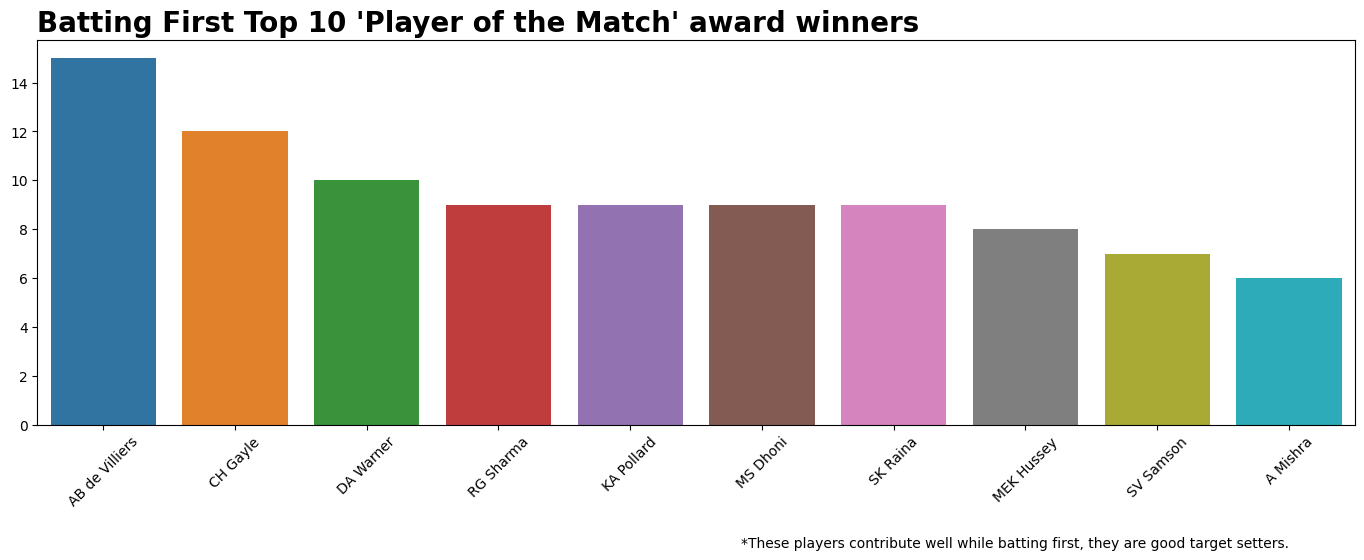

In [24]:
plt.figure(figsize=(17,5))
plot8=sns.barplot(x=list(batting_first['Player_of_Match'].value_counts()[0:10].keys()),
                  y=list(batting_first['Player_of_Match'].value_counts()[0:10]),data=df)
plt.xticks(rotation=45)
plt.title("Batting First Top 10 'Player of the Match' award winners",fontsize=20,loc='left',fontweight='bold')

plot8.text(9, -5, "*These players contribute well while batting first, they are good target setters.", ha='right')

plt.show(plot8)

# Batting Second Analysis
When WonBy is Wickets, team batting second wins.

In [25]:
batting_second=df[df['WonBy']=='Wickets']
batting_second.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
5,1304115,Mumbai,2022-05-21,2022,69,Delhi Capitals,Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,field,N,Mumbai Indians,Wickets,5.0,NaN,JJ Bumrah,"['PP Shaw', 'DA Warner', 'MR Marsh', 'RR Pant'...","['Ishan Kishan', 'RG Sharma', 'D Brevis', 'Til...",Nitin Menon,Tapan Sharma


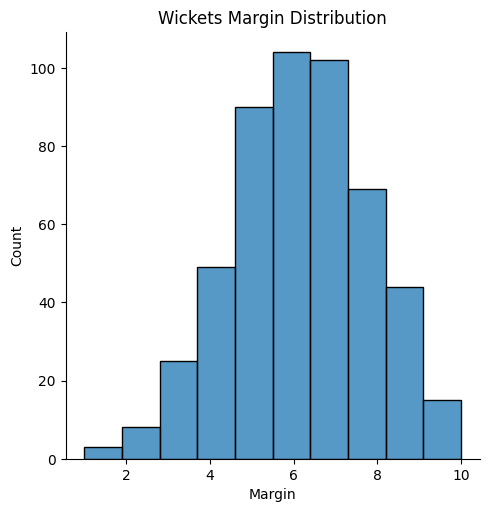

In [26]:
sns.displot(batting_second['Margin'],kde=False,bins=10)
plt.title("Wickets Margin Distribution")

plt.show()

Above histogram shows Wicket margin by which Batting Second teams won the match. Most of the time wicket margin is 5 to 7 wickets.


In [27]:
batting_second['WinningTeam'].value_counts()

Kolkata Knight Riders          68
Mumbai Indians                 63
Chennai Super Kings            60
Royal Challengers Bangalore    59
Rajasthan Royals               57
Kings XI Punjab                45
Delhi Daredevils               42
Sunrisers Hyderabad            38
Delhi Capitals                 20
Gujarat Lions                  12
Deccan Chargers                11
Rising Pune Supergiants         8
Gujarat Titans                  8
Pune Warriors                   6
Punjab Kings                    6
Kochi Tuskers Kerala            4
Lucknow Super Giants            2
Name: WinningTeam, dtype: int64

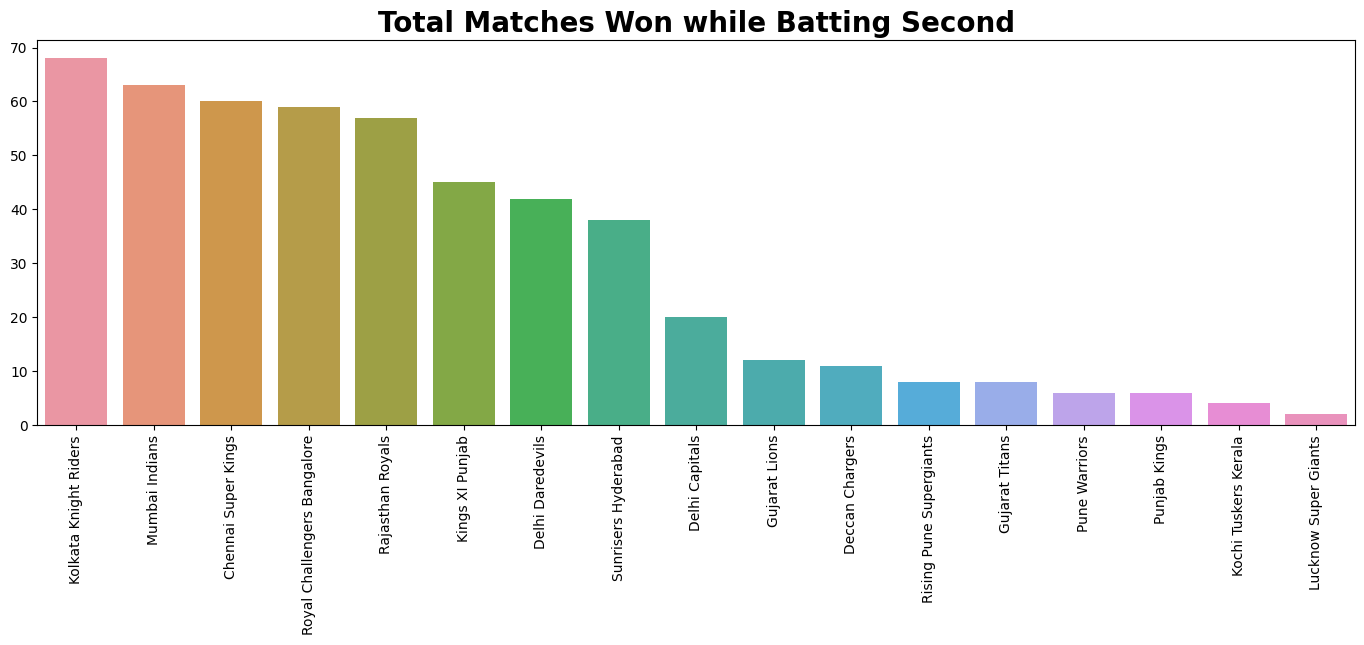

In [28]:
plt.figure(figsize=(17,5))
plot8=sns.barplot(x=list(batting_second['WinningTeam'].value_counts().keys()),y=list(batting_second['WinningTeam'].value_counts())
                  ,data=batting_first)
plt.xticks(rotation=90)
plt.title("Total Matches Won while Batting Second",fontsize=20,loc='center',fontweight='bold')



plt.show(plot8)

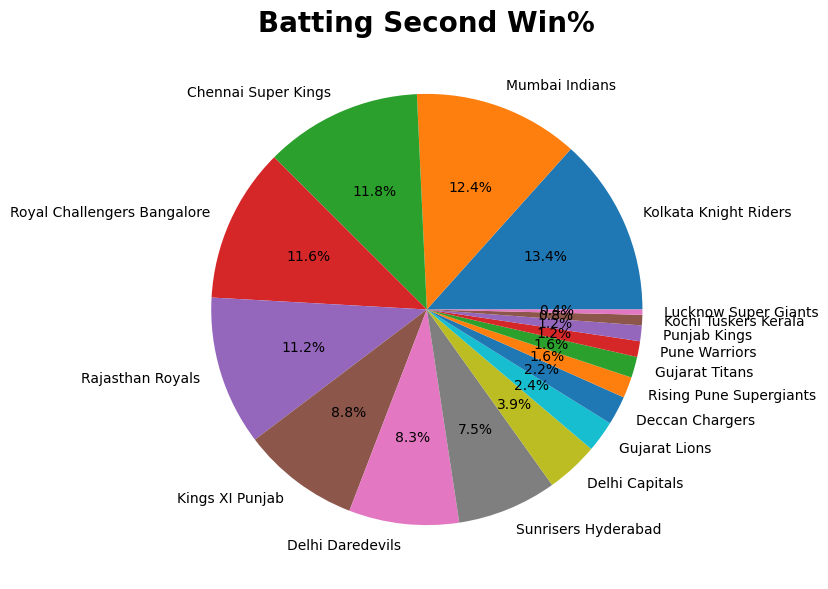

In [29]:
plt.figure(figsize=(7,7))
plot9=plt.pie(list(batting_second['WinningTeam'].value_counts()),labels=list(batting_second['WinningTeam'].value_counts().keys()),
             autopct='%0.1f%%')

plt.title("Batting Second Win%",fontsize=20,loc='center',fontweight='bold')
plt.show(plot9)

# As per above analysis, 'Kolkata Knight Riders' won most of their matches by batting second.

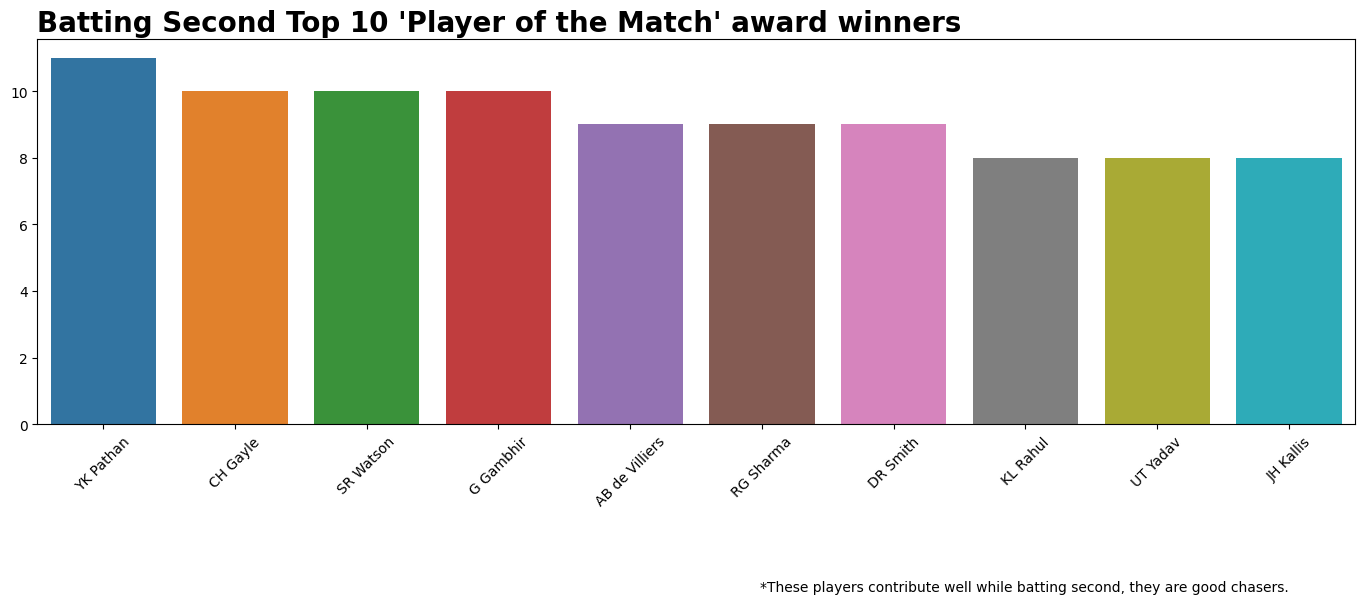

In [30]:
plt.figure(figsize=(17,5))
plot12=sns.barplot(x=list(batting_second['Player_of_Match'].value_counts()[0:10].keys()),
                   y=list(batting_second['Player_of_Match'].value_counts()[0:10]),data=df)
plt.xticks(rotation=45)
plt.title("Batting Second Top 10 'Player of the Match' award winners",fontsize=20,loc='left',fontweight='bold')

plot12.text(9, -5, "*These players contribute well while batting second, they are good chasers.", ha='right')
plt.show(plot12)

# CONCLUSION: Mumbai Indians have dominated IPL though there are few teams who is giving good competition.